In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
lead_data=pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Also dropping the first two columns like prospect id and lead number as of least use.

In [8]:
lead_data=lead_data.drop(['Prospect ID', 'Lead Number'],axis=1)

In [9]:
lead_data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

there are columns with values 'Select' so finding them and replace it with nan values making them missing.. if missing values are within limits like 35-40 percent then drop or else replace them with the unknown

In [10]:
cols_with_select = [col for col in lead_data.columns if 'Select' in lead_data[col].values]
cols_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

we can see these columns are having missing values less than 30% so it is better to replace with unknown rather than missing as it may lead to dropping the columns

In [11]:
lead_data[cols_with_select]=lead_data[cols_with_select].replace('Select','unknown')

In [12]:
lead_data['City'].value_counts()

City
Mumbai                         3222
unknown                        2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

it appears the 'Select' values replaced with unknown

In [13]:
lead_data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

dropping the above 4 columns due to having 40% of missing values

In [14]:
miss_col=[]
for i in lead_data.columns:
    if (lead_data[i].isnull().mean()*100)>40:
        miss_col.append(i)

print('columns having more than 40% null values')
miss_col

columns having more than 40% null values


['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
lead_data=lead_data.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score'],axis=1)

In [16]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,unknown,unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,unknown,unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,unknown,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,unknown,Mumbai,No,No,Modified


In [17]:
lead_data.shape

(9240, 30)

In [18]:
lead_data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

There are number of columns with more than 5% missing values like country, education, specialization, occupation, so will replace them with the 
'unknown' values rather than removing or replacing with mode as we cannot assume a particular value for them also other  columns. so creating a
function and replace them at once

In [19]:
miss_col5=[]
for i in lead_data.columns:
    if (lead_data[i].isnull().mean()*100)>5:
        miss_col5.append(i)

print('columns having more than 5% null values')
miss_col5

columns having more than 5% null values


['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [20]:
for i in miss_col5:
    lead_data[i]=lead_data[i].fillna('unknown')

In [21]:
lead_data.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [22]:
lead_data.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

we can see there  are less number of missing values so deleting the rows dropping them

In [23]:
lead_data=lead_data.dropna()

In [24]:
lead_data.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [25]:
lead_data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64

All most all data of columns is NO by default we can consider that people are not paying through cheque. wo we can remove this columns it

In [26]:
lead_data=lead_data.drop(['I agree to pay the amount through cheque'],axis=1)

In [27]:
lead_data.shape

(9074, 29)

166 rows and 8 columns removed till now

In [28]:
lead_data['Converted'].astype('category').value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

we can see here 3435 are converted while 3639 are not converted

In [29]:
lead_data['Search'].astype('category').value_counts()

Search
No     9060
Yes      14
Name: count, dtype: int64

In [30]:
lead_data['How did you hear about X Education'].astype('category').value_counts()

How did you hear about X Education
unknown                  7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [31]:
lead_data['Specialization'].astype('category').value_counts()

Specialization
unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [32]:
lead_data['What matters most to you in choosing a course'].astype('category').value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
unknown                      2702
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [33]:
lead_data['Tags'].astype('category').value_counts()

Tags
unknown                                              3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

In [34]:
lead_data['Lead Origin'].astype('category').value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [35]:
lead_data['Lead Profile'].astype('category').value_counts()

Lead Profile
unknown                        6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

EDA doing some charts  using matplotlib or seaborn sns

**Univariate**

converted column's bar chart

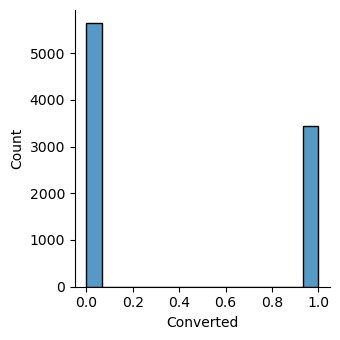

In [36]:
sns.displot(lead_data,x='Converted',height=3.5)
plt.show()

can see  1 is less means converted are less and 0 are more means not converted are more in given data set

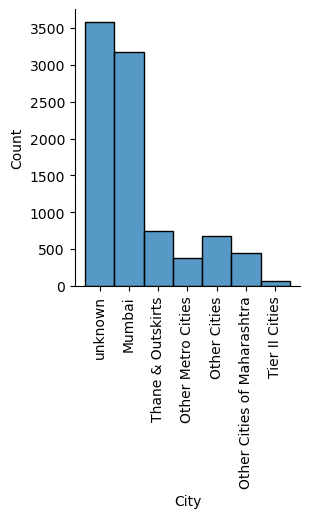

In [37]:
sns.displot(lead_data,x='City',height=3.5)
plt.xticks(rotation=90)
plt.show()

we can see most of them are unknown in general but most from Mumbai

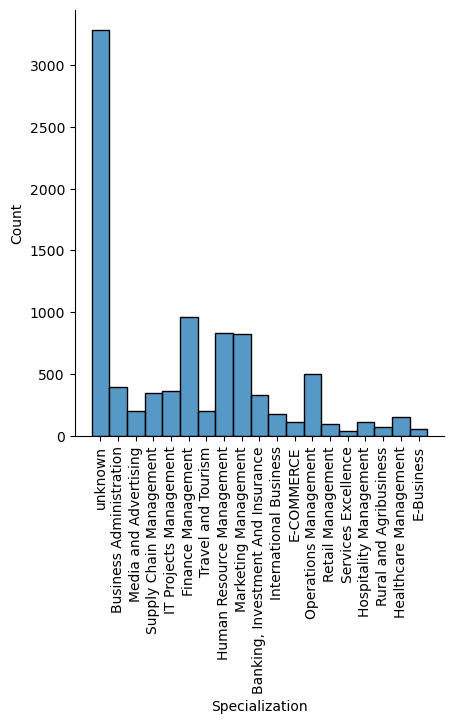

In [38]:
sns.displot(lead_data,x='Specialization')
plt.xticks(rotation=90)
plt.show()

Leaving unknow most of the people are from Finance, HR and Marketing managements ahdnoeast from services excellence

**Bivariate**

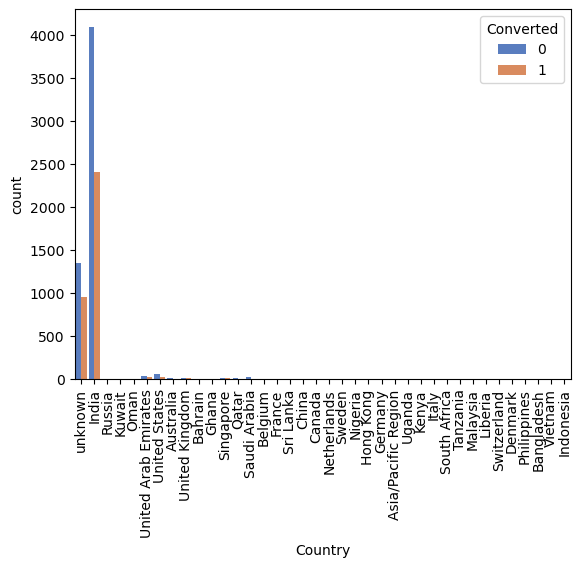

In [39]:
sns.countplot(data=lead_data, x='Country', hue='Converted', palette='muted')
plt.xticks(rotation=90)
plt.show()

we can see most are from the India either converted or not converted and followed by USA, UAE, Saudi Arabia, Qatar, Singapore

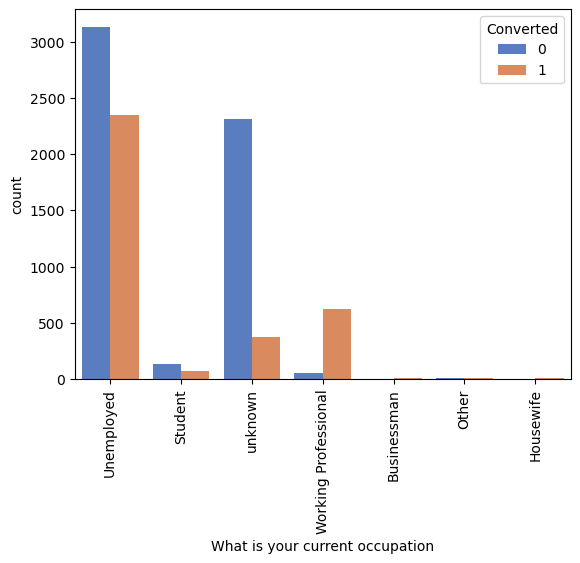

In [40]:
sns.countplot(data=lead_data,x='What is your current occupation',hue='Converted', palette='muted')
plt.xticks(rotation=90)
plt.show()

most of the people who apply are unemployed, but as for working professionals from the applied ones most are converted

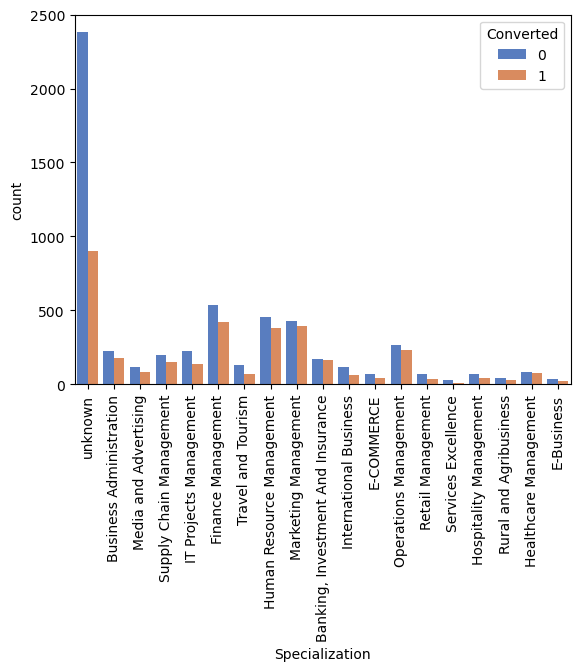

In [41]:
sns.countplot(data=lead_data,x='Specialization',hue='Converted', palette='muted')
plt.xticks(rotation=90)
plt.show()

Again converted are almost equal in finance, hr, marketing management specializations followed by Operations, IT projects, Business admin and supply chain

==================

doing the label encoding here for categorical variables, first will get categorical columns and then do dummy one hot

In [42]:
encoder=LabelEncoder()

In [43]:
cat_cols=lead_data.loc[:,lead_data.dtypes=='object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [44]:
for i in cat_cols:
    encoder=LabelEncoder()
    lead_data[i]=encoder.fit_transform(lead_data[i])


In [45]:
lead_data.shape

(9074, 29)

In [46]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0,0.0,0,0.0,10,37,...,0,0,0,8,0,0,5,6,0,8
1,0,7,0,0,0,5.0,674,2.5,5,12,...,0,0,0,14,0,0,5,6,0,4
2,1,1,0,0,1,2.0,1532,2.0,5,12,...,0,0,0,19,0,0,3,0,1,4
3,1,1,0,0,0,1.0,305,1.0,13,12,...,0,0,0,14,0,0,5,0,0,8
4,1,3,0,0,1,2.0,1428,1.0,1,12,...,0,0,0,19,0,0,5,0,0,8


Splitting the data into the Train and Test data sets 

In [47]:
x=lead_data.drop(['Converted'],axis=1)
y=lead_data['Converted']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [49]:
x_train.shape

(6351, 28)

In [50]:
y_train.shape

(6351,)

In [51]:
x_test.shape

(2723, 28)

In [52]:
y_test.shape

(2723,)

Now that values are converted to numbers i.e label encoding AND data is split ie train test, we can scale the data

I am doing Standard  Scaler

In [53]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [54]:
x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
8174,2,10,0,0,0.0,0,0.0,12,37,18,...,0,0,0,14,0,0,5,6,0,12
6986,0,6,0,0,0.0,0,0.0,12,37,18,...,0,0,0,25,0,0,5,0,0,12
8112,2,10,0,0,0.0,0,0.0,12,37,7,...,0,0,0,19,0,0,3,6,0,12
8530,1,1,0,0,2.0,362,2.0,12,12,15,...,0,0,0,25,0,0,5,0,1,8
6444,0,6,0,0,6.0,168,1.2,10,37,18,...,0,0,0,8,0,0,5,6,0,10


Model Building

In [55]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.1
Date:                Sun, 19 Jan 2025   Deviance:                       5250.2
Time:                        21:18:42   Pearson chi2:                 6.91e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.4601      0.510    -12.656      0.000      -7.461      -5.460
Lead Origin                                       0.5973      0.076      7.905      0.000       0.449       0.745
Lead Source                                       0.1234      0.015      8.301      0.000       0.094       0.153
Do Not Email                                     -1.6777      0.170     -9.887      0.000      -2.010      -1.345
Do Not Call                                      20.5167   2.06e+04      0.001      0.999   -4.04e+04    4.04e+04
TotalVisits                                       0.0223      0.009      2.586      0.010       0.005       0.039
Total Time Spent on Website                       0.0021   7.65e-05     27.585      0.000       0.002       0.002
Page Views Per Visit                             -0.0970      0.024     -4.099      0.000      -0.143      -0.051
Last Activity                                     0.0935      0.016      5.812      0.000       0.062       0.125
Country                                           0.0397      0.005      8.084      0.000       0.030       0.049
Specialization                                   -0.0242      0.008     -3.089      0.002      -0.040      -0.009
How did you hear about X Education                0.0487      0.021      2.371      0.018       0.008       0.089
What is your current occupation                   0.8950      0.108      8.252      0.000       0.682       1.108
What matters most to you in choosing a course    -1.2809      0.078    -16.381      0.000      -1.434      -1.128
Search                                           -0.7790      0.955     -0.816      0.414      -2.650       1.092
Magazine                                        -4.5e-10   4.55e-07     -0.001      0.999   -8.91e-07    8.91e-07
Newspaper Article                                -0.2096   2.07e+04  -1.01e-05      1.000   -4.05e+04    4.05e+04
X Education Forums                               -0.2096   2.07e+04  -1.01e-05      1.000   -4.05e+04    4.05e+04
Newspaper                                      8.015e-12   1.07e-08      0.001      0.999    -2.1e-08     2.1e-08
Digital Advertisement                           -20.3173   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                           1.2307      2.154      0.571      0.568      -2.990       5.452
Receive More Updates About Our Courses        -2.574e-15    8.5e-12     -0.000      1.000   -1.67e-11    1.67e-11
Tags                                              0.0903      0.005     16.874      0.000       0.080       0.101
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get u

**Logistic Regression**

In [56]:
logreg=LogisticRegression()

In [57]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred=logreg.predict(x_test)

In [59]:
print('Accuracy')
print(accuracy_score(y_test,y_pred)*100)

Accuracy
79.50789570326845


In [60]:
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))

confusion matrix
[[1492  232]
 [ 326  673]]


In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1724
           1       0.74      0.67      0.71       999

    accuracy                           0.80      2723
   macro avg       0.78      0.77      0.77      2723
weighted avg       0.79      0.80      0.79      2723



RFE - VIF

In [62]:
logreg = LogisticRegression(max_iter=250)

In [63]:
rfe=RFE(logreg,n_features_to_select=15)

In [64]:
rfe_train=rfe.fit(x_train,y_train)

In [65]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True])

In [66]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', False, 4),
 ('Specialization', False, 2),
 ('How did you hear about X Education', True, 1),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 10),
 ('Newspaper Article', False, 7),
 ('X Education Forums', False, 8),
 ('Newspaper', False, 11),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', False, 9),
 ('Receive More Updates About Our Courses', False, 12),
 ('Tags', True, 1),
 ('Update me on Supply Chain Content', False, 13),
 ('Get updates on DM Content', False, 14),
 ('Lead Profile', True, 1),
 ('City', False, 3),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1)]

In [67]:
col=x_train.columns[rfe.support_]

In [68]:
x_train.columns[~rfe.support_]

Index(['Total Time Spent on Website', 'Country', 'Specialization', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City'],
      dtype='object')

In [69]:
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3097.0
Date:                Sun, 19 Jan 2025   Deviance:                       6194.0
Time:                        21:18:48   Pearson chi2:                 7.34e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2997
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.9045      0.483    -10.159      0.000      -5.851      -3.958
Lead Origin                                       0.6381      0.065      9.858      0.000       0.511       0.765
Lead Source                                       0.0849      0.012      6.937      0.000       0.061       0.109
Do Not Email                                     -1.7645      0.157    -11.258      0.000      -2.072      -1.457
Do Not Call                                      20.5575   1.17e+04      0.002      0.999    -2.3e+04     2.3e+04
TotalVisits                                       0.0300      0.009      3.374      0.001       0.013       0.047
Page Views Per Visit                             -0.0478      0.020     -2.442      0.015      -0.086      -0.009
Last Activity                                     0.0865      0.014      6.017      0.000       0.058       0.115
How did you hear about X Education                0.0100      0.017      0.589      0.556      -0.023       0.043
What is your current occupation                   0.9659      0.107      9.051      0.000       0.757       1.175
What matters most to you in choosing a course    -1.3391      0.076    -17.712      0.000      -1.487      -1.191
Search                                           -0.6080      0.918     -0.662      0.508      -2.407       1.191
Tags                                              0.0913      0.005     18.500      0.000       0.082       0.101
Lead Profile                                     -0.5295      0.034    -15.678      0.000      -0.596      -0.463
A free copy of Mastering The Interview           -0.2964      0.089     -3.327      0.001      -0.471      -0.122
Last Notable Activity                             0.0591      0.016      3.711      0.000       0.028       0.090
=================================================================================================================
"""

predicted values from train set

In [70]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

8174    0.825319
6986    0.719365
8112    0.982608
8530    0.182617
6444    0.314480
2489    0.874306
1737    0.868490
7461    0.334792
2370    0.092722
5290    0.185804
dtype: float64

In [71]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.82531949, 0.71936475, 0.98260822, ..., 0.5663961 , 0.21452975,
       0.12065495])

In [72]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Convert_prob':y_train_pred})
y_train_pred_final['Lead_ID']=y_train.index
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID
0,0,0.825319,8174
1,1,0.719365,6986
2,1,0.982608,8112
3,0,0.182617,8530
4,0,0.314480,6444


new col predicted with 1 if convert_prob > 0.5 else 0

In [73]:
y_train_pred_final['predicted']=y_train_pred_final.Convert_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted
0,0,0.825319,8174,1
1,1,0.719365,6986,1
2,1,0.982608,8112,1
3,0,0.182617,8530,0
4,0,0.314480,6444,0


**Confusion Matrix**

In [74]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3347  568]
 [ 833 1603]]


In [75]:
print('Accuracy')
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

Accuracy
0.7794048181388757


removing variable with high p value 'Do Not Call'

In [76]:
col=col.drop('Do Not Call',1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Page Views Per Visit', 'Last Activity',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

**re run model**

In [77]:
x_train_sm=sm.add_constant(x_train[col])
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3098.4
Date:                Sun, 19 Jan 2025   Deviance:                       6196.7
Time:                        21:18:53   Pearson chi2:                 7.35e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2994
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.8956      0.483    -10.143      0.000      -5.842      -3.950
Lead Origin                                       0.6370      0.065      9.852      0.000       0.510       0.764
Lead Source                                       0.0851      0.012      6.957      0.000       0.061       0.109
Do Not Email                                     -1.7653      0.157    -11.263      0.000      -2.072      -1.458
TotalVisits                                       0.0303      0.009      3.393      0.001       0.013       0.048
Page Views Per Visit                             -0.0482      0.020     -2.463      0.014      -0.087      -0.010
Last Activity                                     0.0862      0.014      5.994      0.000       0.058       0.114
How did you hear about X Education                0.0091      0.017      0.539      0.590      -0.024       0.042
What is your current occupation                   0.9655      0.107      9.048      0.000       0.756       1.175
What matters most to you in choosing a course    -1.3393      0.076    -17.717      0.000      -1.487      -1.191
Search                                           -0.6087      0.918     -0.663      0.507      -2.408       1.190
Tags                                              0.0913      0.005     18.505      0.000       0.082       0.101
Lead Profile                                     -0.5292      0.034    -15.675      0.000      -0.595      -0.463
A free copy of Mastering The Interview           -0.2957      0.089     -3.319      0.001      -0.470      -0.121
Last Notable Activity                             0.0595      0.016      3.735      0.000       0.028       0.091
=================================================================================================================
"""

removing variable 'How did you hear about X Education'

In [78]:
col=col.drop('How did you hear about X Education',1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [79]:
x_train_sm=sm.add_constant(x_train[col])
logm4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3098.5
Date:                Sun, 19 Jan 2025   Deviance:                       6197.0
Time:                        21:18:53   Pearson chi2:                 7.35e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2994
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.8297      0.467    -10.348      0.000      -5.745      -3.915
Lead Origin                                       0.6240      0.060     10.416      0.000       0.507       0.741
Lead Source                                       0.0870      0.012      7.438      0.000       0.064       0.110
Do Not Email                                     -1.7595      0.156    -11.258      0.000      -2.066      -1.453
TotalVisits                                       0.0298      0.009      3.366      0.001       0.012       0.047
Page Views Per Visit                             -0.0501      0.019     -2.603      0.009      -0.088      -0.012
Last Activity                                     0.0861      0.014      5.991      0.000       0.058       0.114
What is your current occupation                   0.9669      0.107      9.065      0.000       0.758       1.176
What matters most to you in choosing a course    -1.3405      0.076    -17.742      0.000      -1.489      -1.192
Search                                           -0.5971      0.918     -0.651      0.515      -2.395       1.201
Tags                                              0.0913      0.005     18.508      0.000       0.082       0.101
Lead Profile                                     -0.5292      0.034    -15.676      0.000      -0.595      -0.463
A free copy of Mastering The Interview           -0.2716      0.077     -3.528      0.000      -0.422      -0.121
Last Notable Activity                             0.0595      0.016      3.738      0.000       0.028       0.091
=================================================================================================================
"""

removing variable 'Search'

In [80]:
col=col.drop('Search',1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [81]:
x_train_sm=sm.add_constant(x_train[col])
logm5=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3098.7
Date:                Sun, 19 Jan 2025   Deviance:                       6197.5
Time:                        21:18:54   Pearson chi2:                 7.35e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2993
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.8284      0.467    -10.345      0.000      -5.743      -3.914
Lead Origin                                       0.6242      0.060     10.420      0.000       0.507       0.742
Lead Source                                       0.0871      0.012      7.440      0.000       0.064       0.110
Do Not Email                                     -1.7588      0.156    -11.255      0.000      -2.065      -1.452
TotalVisits                                       0.0294      0.009      3.343      0.001       0.012       0.047
Page Views Per Visit                             -0.0501      0.019     -2.604      0.009      -0.088      -0.012
Last Activity                                     0.0860      0.014      5.984      0.000       0.058       0.114
What is your current occupation                   0.9659      0.107      9.057      0.000       0.757       1.175
What matters most to you in choosing a course    -1.3401      0.076    -17.738      0.000      -1.488      -1.192
Tags                                              0.0913      0.005     18.512      0.000       0.082       0.101
Lead Profile                                     -0.5290      0.034    -15.673      0.000      -0.595      -0.463
A free copy of Mastering The Interview           -0.2711      0.077     -3.523      0.000      -0.422      -0.120
Last Notable Activity                             0.0598      0.016      3.758      0.000       0.029       0.091
=================================================================================================================
"""

Now the p  values are almost less than 0.05, so checking the accuracy and then the VIF values and accuracy again

In [82]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

8174    0.823084
6986    0.720115
8112    0.982326
8530    0.181493
6444    0.313801
2489    0.873187
1737    0.867934
7461    0.343097
2370    0.092072
5290    0.183509
dtype: float64

In [83]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.82308355, 0.72011522, 0.98232618, ..., 0.56011714, 0.21275044,
       0.1208189 ])

In [84]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Convert_prob':y_train_pred})
y_train_pred_final['Lead_ID']=y_train.index
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID
0,0,0.823084,8174
1,1,0.720115,6986
2,1,0.982326,8112
3,0,0.181493,8530
4,0,0.313801,6444


In [85]:
y_train_pred_final['predicted']=y_train_pred_final.Convert_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted
0,0,0.823084,8174,1
1,1,0.720115,6986,1
2,1,0.982326,8112,1
3,0,0.181493,8530,0
4,0,0.313801,6444,0


Confusion Matrix

In [86]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3346  569]
 [ 835 1601]]


In [87]:

print('Accuracy')
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

Accuracy
0.778932451582428


Accuracy did not change much , now checking for **VIF** values

VIF

In [88]:
vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF']=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,What is your current occupation,38.36
9,Lead Profile,20.51
11,Last Notable Activity,16.11
5,Last Activity,13.05
8,Tags,8.73
1,Lead Source,3.58
7,What matters most to you in choosing a course,3.48
4,Page Views Per Visit,3.23
0,Lead Origin,2.77
10,A free copy of Mastering The Interview,1.97


very high VIFs values for many variabels.
will drop what is your current occupation first

In [89]:
col=col.drop('What is your current occupation',1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### rerun model

In [90]:
x_train_sm=sm.add_constant(x_train[col])
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3148.1
Date:                Sun, 19 Jan 2025   Deviance:                       6296.3
Time:                        21:19:00   Pearson chi2:                 7.29e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2884
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9468      0.177     -5.364      0.000      -1.293      -0.601
Lead Origin                                       0.6535      0.059     11.024      0.000       0.537       0.770
Lead Source                                       0.0888      0.012      7.638      0.000       0.066       0.112
Do Not Email                                     -1.7864      0.155    -11.530      0.000      -2.090      -1.483
TotalVisits                                       0.0297      0.009      3.375      0.001       0.012       0.047
Page Views Per Visit                             -0.0529      0.019     -2.769      0.006      -0.090      -0.015
Last Activity                                     0.0856      0.014      6.023      0.000       0.058       0.113
What matters most to you in choosing a course    -0.7215      0.031    -23.608      0.000      -0.781      -0.662
Tags                                              0.0949      0.005     19.479      0.000       0.085       0.104
Lead Profile                                     -0.5479      0.033    -16.525      0.000      -0.613      -0.483
A free copy of Mastering The Interview           -0.2661      0.076     -3.495      0.000      -0.415      -0.117
Last Notable Activity                             0.0655      0.016      4.159      0.000       0.035       0.096
=================================================================================================================
"""

In [91]:
y_train_pred=res.predict(x_train_sm).values.reshape(-1)

In [92]:
y_train_pred[:10]

array([0.83887393, 0.73723624, 0.96158452, 0.18274559, 0.31669026,
       0.73811442, 0.72962805, 0.34605534, 0.09117694, 0.18666062])

In [93]:
y_train_pred_final['Convert_prob']=y_train_pred

predicted with 1 if Convert_prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted']=y_train_pred_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted
0,0,0.838874,8174,1
1,1,0.737236,6986,1
2,1,0.961585,8112,1
3,0,0.182746,8530,0
4,0,0.316690,6444,0


In [95]:
print('Accuracy')
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

Accuracy
0.7754684301684774


Accuracy did not drop much 
checking VIF again

In [96]:
vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF']=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,Last Notable Activity,15.40
5,Last Activity,13.05
8,Lead Profile,11.45
7,Tags,8.08
1,Lead Source,3.31
4,Page Views Per Visit,3.18
0,Lead Origin,2.66
6,What matters most to you in choosing a course,2.30
9,A free copy of Mastering The Interview,1.95
3,TotalVisits,1.88


dropping Last Notable Activity as it is high VIF

In [97]:
col=col.drop('Last Notable Activity')
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [98]:
x_train_sm=sm.add_constant(x_train[col])
logm4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3156.7
Date:                Sun, 19 Jan 2025   Deviance:                       6313.4
Time:                        21:19:04   Pearson chi2:                 7.34e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2864
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7890      0.172     -4.575      0.000      -1.127      -0.451
Lead Origin                                       0.6493      0.059     10.962      0.000       0.533       0.765
Lead Source                                       0.0870      0.012      7.497      0.000       0.064       0.110
Do Not Email                                     -1.7166      0.154    -11.127      0.000      -2.019      -1.414
TotalVisits                                       0.0282      0.009      3.244      0.001       0.011       0.045
Page Views Per Visit                             -0.0555      0.019     -2.920      0.003      -0.093      -0.018
Last Activity                                     0.1324      0.009     14.682      0.000       0.115       0.150
What matters most to you in choosing a course    -0.7263      0.030    -23.814      0.000      -0.786      -0.666
Tags                                              0.0940      0.005     19.361      0.000       0.084       0.104
Lead Profile                                     -0.5448      0.033    -16.420      0.000      -0.610      -0.480
A free copy of Mastering The Interview           -0.2622      0.076     -3.451      0.001      -0.411      -0.113
=================================================================================================================
"""

In [99]:
y_train_pred=res.predict(x_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.82638922, 0.72064714, 0.95770082, 0.20857721, 0.3073568 ,
       0.77085581, 0.74886698, 0.37926932, 0.09940673, 0.1641    ])

In [100]:
y_train_pred_final['Convert_prob']=y_train_pred

In [101]:
y_train_pred_final['predicted']=y_train_pred_final.Convert_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted
0,0,0.826389,8174,1
1,1,0.720647,6986,1
2,1,0.957701,8112,1
3,0,0.208577,8530,0
4,0,0.307357,6444,0


In [102]:
print('Accuracy')
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

Accuracy
0.7797197291765077


Other Metrics

In [103]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3310  605]
 [ 794 1642]]


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# sensitivity
print('sensitivity')
print(TP / float(TP+FN))

sensitivity
0.674055829228243


In [106]:
# specificity
print('specificity')
print(TN / float(TN+FP))

specificity
0.8454661558109834


In [107]:
# positive predictive value
print('ppr')
print (TP / float(TP+FP))

ppr
0.730752113929684


In [108]:
# Negative predictive value
print('npv')
print (TN / float(TN+ FN))

npv
0.8065302144249513


**ROC curve**

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_prob, drop_intermediate = False )

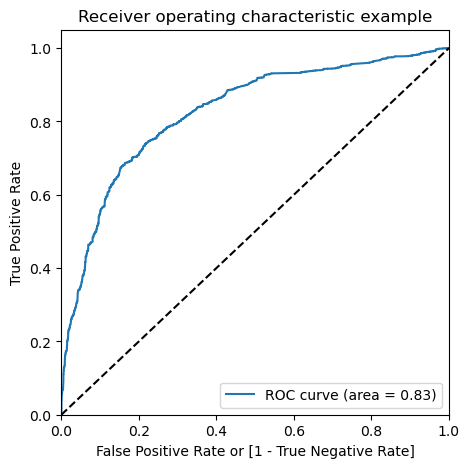

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

finding optimal cutoff point is probability where we get balanced sensitivity and specifity

In [112]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.826389,8174,1,1,1,1,1,1,1,1,1,1,0
1,1,0.720647,6986,1,1,1,1,1,1,1,1,1,0,0
2,1,0.957701,8112,1,1,1,1,1,1,1,1,1,1,1
3,0,0.208577,8530,0,1,1,1,0,0,0,0,0,0,0
4,0,0.307357,6444,0,1,1,1,1,0,0,0,0,0,0


In [113]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383562  1.000000  0.000000
0.1   0.1  0.495040  0.960591  0.205364
0.2   0.2  0.664777  0.900246  0.518263
0.3   0.3  0.731223  0.812397  0.680715
0.4   0.4  0.761297  0.747947  0.769604
0.5   0.5  0.779720  0.674056  0.845466
0.6   0.6  0.757046  0.515599  0.907280
0.7   0.7  0.720674  0.351396  0.950447
0.8   0.8  0.686978  0.211002  0.983142
0.9   0.9  0.641001  0.071018  0.995658


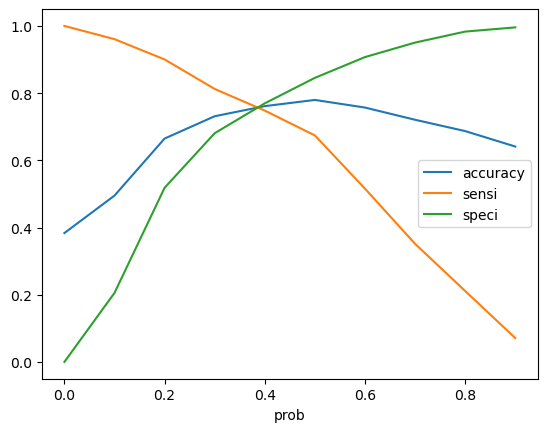

In [114]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

curve above depicts 0.4 prob as cut off 

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.826389,8174,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.720647,6986,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.957701,8112,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.208577,8530,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.307357,6444,0,1,1,1,1,0,0,0,0,0,0,1


In [116]:
print('accuracy')
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

accuracy
0.7312234293811998


In [117]:
confus = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confus

array([[2665, 1250],
       [ 457, 1979]], dtype=int64)

In [118]:
TP = confus[1,1] # true positive 
TN = confus[0,0] # true negatives
FP = confus[0,1] # false positives
FN = confus[1,0] # false negatives

In [119]:
# sensitivity
print('sensitivity')
print(TP / float(TP+FN))

# specificity
print('specificity')
print(TN / float(TN+FP))


# positive predictive value
print('ppr')
print (TP / float(TP+FP))

# Negative predictive value
print('npv')
print (TN / float(TN+ FN))






sensitivity
0.8123973727422004
specificity
0.6807151979565773
ppr
0.612883245586869
npv
0.8536194746957079


In [120]:
print('precision')
print(confus[1,1]/(confus[0,1]+confus[1,1]))

precision
0.612883245586869


In [121]:
print('recall')
print(confus[1,1]/(confus[1,0]+confus[1,1]))

recall
0.8123973727422004


Predictions on TEST set

In [124]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [125]:
x_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
3374,1,1,0,0,6.0,63,3.00,12,12,8,...,0,0,0,25,0,0,5,2,1,12
4262,0,6,0,0,0.0,0,0.00,5,37,18,...,0,0,0,25,0,0,5,6,0,4
7855,0,3,0,0,3.0,83,3.00,9,12,18,...,0,0,0,25,0,0,5,6,0,8
3017,1,3,0,0,4.0,1173,4.00,3,12,16,...,0,0,0,25,0,0,5,0,0,2
560,0,6,0,0,5.0,1387,1.67,5,12,0,...,0,0,0,19,0,0,3,4,1,4


In [142]:
logreg.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=250)

In [143]:
x_test_sm=sm.add_constant(x_test_scaled)

In [151]:
y_pred = logreg.predict(x_test_sm)

In [137]:
x_train.shape

(6351, 28)

In [138]:
x_test.shape

(2723, 28)

In [139]:
y_train.shape

(6351,)

In [140]:
y_test.shape

(2723,)

In [152]:
print('Accuracy')
print(accuracy_score(y_test,y_pred))


Accuracy
0.8141755416819684


In [154]:
print('classification_report')
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1724
           1       0.77      0.70      0.73       999

    accuracy                           0.81      2723
   macro avg       0.80      0.79      0.80      2723
weighted avg       0.81      0.81      0.81      2723



In [156]:
print('Confusion Matric')
print(confusion_matrix(y_test, y_pred))

Confusion Matric
[[1517  207]
 [ 299  700]]


In [157]:
y_pred_prob = logreg.predict_proba(x_test_sm)[:, 1]

In [160]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

print("Precision")
print(precision_score(y_test, y_pred))

print("Recall")
print(recall_score(y_test, y_pred))


Accuracy
0.8141755416819684
Precision
0.7717750826901875
Recall
0.7007007007007007


I got train data set accuracy of around 73% and the test data accuracy of 81%

In [162]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1724
           1       0.77      0.70      0.73       999

    accuracy                           0.81      2723
   macro avg       0.80      0.79      0.80      2723
weighted avg       0.81      0.81      0.81      2723



In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.7950138652233469


assigning the lead_score... here high converted probability gets high lead score  

In [164]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Convert_prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.826389,8174,1,1,1,1,1,1,1,1,1,1,0,1,83
1,1,0.720647,6986,1,1,1,1,1,1,1,1,1,0,0,1,72
2,1,0.957701,8112,1,1,1,1,1,1,1,1,1,1,1,1,96
3,0,0.208577,8530,0,1,1,1,0,0,0,0,0,0,0,0,21
4,0,0.307357,6444,0,1,1,1,1,0,0,0,0,0,0,1,31
